In [ ]:
"""
Notebook for Election Analysis Project, following similar strucuture to data analysis and visualisation 
Udemy Course with my own various additions and amendments. This data analysis focuses on the 2012 US election and features
a variety of data manipulations and visualisations to understand the various patterns and trends of the election.


"""

In [2]:
#Importing required modules and dependancies 
#libraries for data manipulation
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

#visualtion 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#requests used for acquiring relevant dataset from url to be used in analysis
import requests
try:
    from StringIO import StringIO 
except ImportError:
    from io import StringIO 
from datetime import datetime

In [3]:
url = 'http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv'

In [4]:
#getting text from url and using StringIO method to convert data into readable csv 
source = requests.get(url).text

poll_data = StringIO(source)

In [5]:
#import csv and convert to dataframe
poll_df = pd.read_csv(poll_data)

poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [6]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


/Users/adammckenna/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1, 'Affiliation of polling organisations')

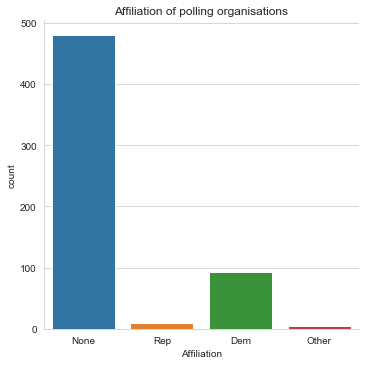

In [7]:
#factorplot of the affiliation of the organisations conduting the polling in the dataset
sns.factorplot('Affiliation', data = poll_df, kind='count')
plt.title('Affiliation of polling organisations')

Text(0.5, 1, 'Affiliation of polling companies by population category')

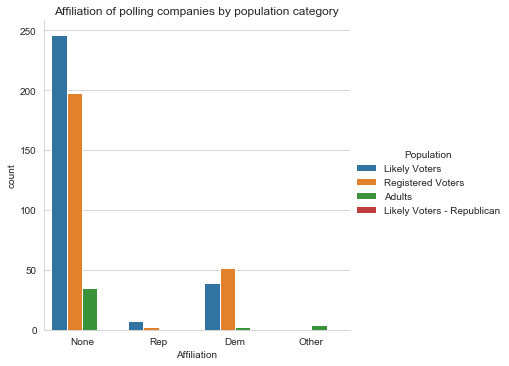

In [8]:
#factorplot of the affiliation of the organisations conducting the polling by population category 
sns.factorplot('Affiliation', data = poll_df, kind='count', hue='Population')
plt.title('Affiliation of polling companies by population category')

In [14]:
avg = pd.DataFrame(poll_df.mean())

#drop columns in dataset not required for data analysis
avg.drop('Number of Observations', axis = 0, inplace =True)
avg.drop('Question Text', axis = 0, inplace = True)
avg.drop('Question Iteration', axis = 0, inplace=True)

In [15]:
avg

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238


In [20]:
#Create new DF which shows the standard deviation for each presidential candidate
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations', axis = 0, inplace = True)

In [21]:
std.head()

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726
Question Text,NaN


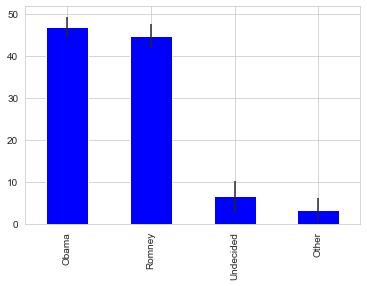

In [37]:
#Plot of the average proportion of votes for each candidiate in percentage, std dev shown by black line
avg.plot(yerr = std, kind ='bar', legend = False, cmap='winter')

In [47]:
#Creating new DF to hold the average proportion of votes and associated std dev for each candidate
poll_avg = pd.concat([avg, std], axis = 1)
poll_avg.columns = ['Average', 'STD']
poll_avg.drop(['Question Iteration', 'Question Text'], inplace = True)

/Users/adammckenna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [48]:
poll_avg

,Average,STD
Obama,46.805461,2.422058
Other,3.376238,2.692726
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


Text(0.5, 1.0, 'Proportion of votes for each candidate')

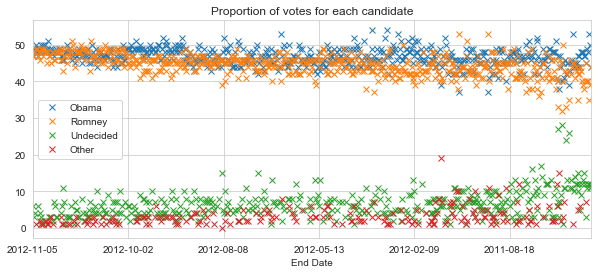

In [52]:
#Plot showing the proportion of votes for each candidate over the period of a year
poll_df.plot(x='End Date', y = ['Obama','Romney','Undecided', 'Other'], linestyle = '', marker = 'x',figsize=(10,4))
plt.title('Proportion of votes for each candidate')

In [54]:
#New column difference shows the % difference b/w Obama & Romney, +ve means Obama is ahead, vice versa 
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100
poll_df.head(15)

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01
5,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06T07:38:41Z,1041.0,Likely Voters,Internet,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.jzanalytics.com/,Sponsor,Rep,NaN,1,0.00
6,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05T18:30:15Z,3000.0,Likely Voters,Live Phone,49.0,48.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,NaN,Nonpartisan,None,NaN,1,0.01
7,Ipsos/Reuters (Web),2012-11-01,2012-11-05,2012-11-05T16:12:48Z,4725.0,Likely Voters,Internet,48.0,46.0,4.0,2.0,https://elections.huffingtonpost.com/pollster/...,http://big.assets.huffingtonpost.com/ipsos1105...,Nonpartisan,None,NaN,1,0.02
8,ARG,2012-11-02,2012-11-04,2012-11-05T13:06:54Z,1200.0,Likely Voters,Live Phone,49.0,49.0,1.0,1.0,https://elections.huffingtonpost.com/pollster/...,http://americanresearchgroup.com/pres2012/NA12...,Nonpartisan,None,NaN,1,0.00
9,PPP (D-Americans United for Change),2012-11-02,2012-11-04,2012-11-04T22:32:19Z,1200.0,Likely Voters,Automated Phone,50.0,48.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/2011/PP...,Sponsor,Dem,NaN,1,0.02


In [55]:
#Rearrange and group rows in DF, ordering by Start Date column 
poll_df = poll_df.groupby(['Start Date'], as_index = False).mean()
poll_df.tail()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
352,2012-10-31,10420.250000,48.00,46.50,4.000000,2.0,NaN,1,0.0150
353,2012-11-01,1989.000000,49.00,47.25,2.400000,1.5,NaN,1,0.0175
354,2012-11-02,1041.750000,49.25,48.50,2.000000,1.0,NaN,1,0.0075
355,2012-11-03,1310.833333,48.50,48.00,4.333333,1.0,NaN,1,0.0050
356,2012-11-04,1000.000000,47.00,47.00,6.000000,NaN,NaN,1,0.0000


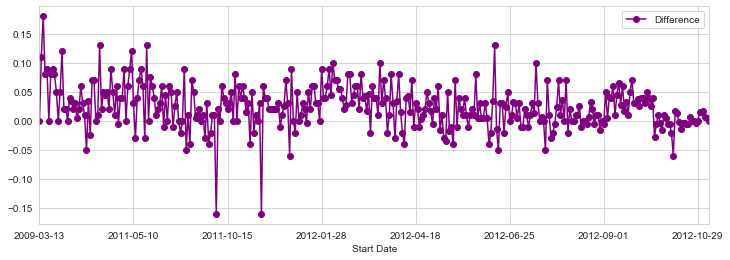

In [56]:
#Plot % difference for Obama & Romney for each date within the dataset
poll_df.plot('Start Date', 'Difference', figsize =(12,4), marker='o', linestyle = '-', color = 'purple')

In [57]:
#Getting the rows of the dataset for Oct 2012 which is when some of the big debates occurred
#appending the row index values to an array and getting the min and max of this array to get the window for October
row_in = 0 
xlimit = [] 
for date in poll_df['Start Date']:
    
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in +=1

print (min(xlimit))
print (max(xlimit))
    

325
352


Text(0.5, 1.0, 'Difference in % for Obama vs Romney for month of October 2012')

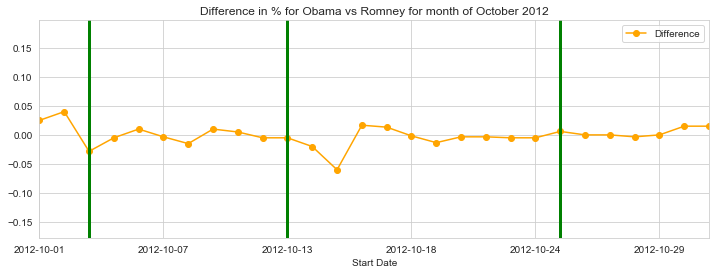

In [59]:
#Plot the % difference for Obama vs Romney for the month of October
#The green lines in the plot show the 3 main debates for the month
poll_df.plot('Start Date', 'Difference', figsize =(12,4), marker='o', linestyle = '-', color = 'orange', xlim = (325,352))

plt.axvline(x=(min(xlimit)+2), linewidth =3, color ='green', linestyle = '-')
plt.axvline(x=(min(xlimit)+10), linewidth =3, color ='green')
plt.axvline(x=(min(xlimit)+21), linewidth =3, color ='green')
plt.title('Difference in % for Obama vs Romney for month of October 2012')

In [60]:
#Import new csv which is a dataset of donors for the election
donor_df = pd.read_csv("Election_Donor_Data.csv")

/Users/adammckenna/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [61]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [24]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [62]:
#Counting all of the donor amounts and the amount of times that amount was donated
donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 174.80          1
 7.27            1
 1219.00         1
 1884.88         1
 162.25          1
 218.31          1
 78.62           1
 203.16          1
 53.11           1
 499.66          1
 19.53           1
 188.60          1
 47.10           1
 19.85           1
 28.83           1
 202.59          1
-5500.00         1
 9.25            1
 202.66          1
 1205.00         1
 80.73           1
 115.07     

In [63]:
#Calculating the mean and standard deviation for the amount that was donated by all the donors 
donor_mean = donor_df['contb_receipt_amt'].mean()

donor_std = donor_df['contb_receipt_amt'].std()

print ("The average donation was %.2f with a std of %.2f" %(donor_mean, donor_std))

The average donation was 298.24 with a std of 3749.67


In [65]:
#Crete new DF which is a copy of the amount donated column 
#this DF is used to calculate the top donor amounts 
top_donor = donor_df['contb_receipt_amt'].copy()

top_donor.sort_values() 

top_donor

0           250.0
1            50.0
2           250.0
3           250.0
4           300.0
5           500.0
6           250.0
7           250.0
8           250.0
9           250.0
10          250.0
11          500.0
12          250.0
13          250.0
14          250.0
15          300.0
16          500.0
17         1000.0
18          250.0
19          300.0
20          500.0
21          250.0
22         2500.0
23         2500.0
24          150.0
25          200.0
26          100.0
27          250.0
28          500.0
29          250.0
            ...  
1001701    2500.0
1001702    2500.0
1001703   -2500.0
1001704   -2500.0
1001705    1000.0
1001706    2500.0
1001707   -2500.0
1001708    2500.0
1001709   -2500.0
1001710   -2500.0
1001711    1000.0
1001712    2500.0
1001713    2500.0
1001714     250.0
1001715     250.0
1001716    1000.0
1001717     100.0
1001718    2500.0
1001719    2500.0
1001720     100.0
1001721     250.0
1001722     100.0
1001723     100.0
1001724     500.0
1001725   

In [66]:
#Removing any negative values from DF by ensuring amount is > 0
top_donor = top_donor[top_donor > 0]

top_donor.sort_values()

top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

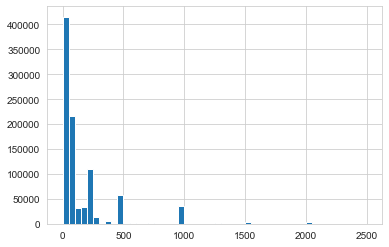

In [67]:
#Work out the most common donation amounts and plot a histogram showing the most common amounts < 2500
common_don = top_donor[top_donor < 2500]

common_don.hist(bins = 50)

In [68]:
#Get unique array of each candidate from the main DF
candidates = donor_df.cand_nm.unique()

candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [69]:
# Dictionary of party affiliation, mapping candidate to party 
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

#Create new column in donor DF which maps the donor candidate to their respective party
donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [70]:
#Removing negative amounts from the donor amount column
donor_df = donor_df[donor_df.contb_receipt_amt > 0]

In [71]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [72]:
#Group candidates by name by the total amount of donations they received
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [73]:
#Group candidates by name by the total amount of donations they received and the sum of all those donations
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [75]:
#Calculate the total amount donated to each candidate and print it out
cand_amt = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

counter = 0

for donor in cand_amt:
    print ('The candidate %s raised %.0f dollars'%(cand_amt.index[counter], donor))
    print ('\n')
    counter +=1

The candidate Bachmann, Michelle raised 2711439 dollars


The candidate Cain, Herman raised 7101082 dollars


The candidate Gingrich, Newt raised 12832770 dollars


The candidate Huntsman, Jon raised 3330373 dollars


The candidate Johnson, Gary Earl raised 566962 dollars


The candidate McCotter, Thaddeus G raised 39030 dollars


The candidate Obama, Barack raised 135877427 dollars


The candidate Paul, Ron raised 21009620 dollars


The candidate Pawlenty, Timothy raised 6004819 dollars


The candidate Perry, Rick raised 20305754 dollars


The candidate Roemer, Charles E. 'Buddy' III raised 373010 dollars


The candidate Romney, Mitt raised 88335908 dollars


The candidate Santorum, Rick raised 11043159 dollars




Text(0.5, 1.0, 'Amount donated for each candidate')

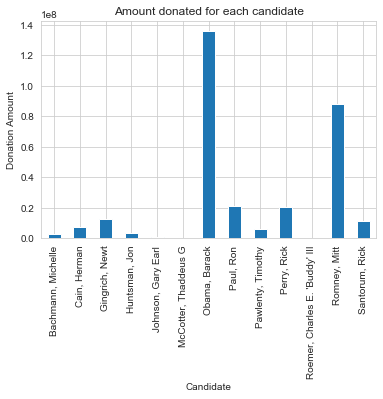

In [76]:
#Barchart to show the amount donated to each candidate
cand_amt.plot(kind ='bar')
plt.xlabel('Candidate')
plt.ylabel('Donation Amount')
plt.title('Amount donated for each candidate')

Text(0.5, 1.0, 'Amount Donated for the 2 main parties')

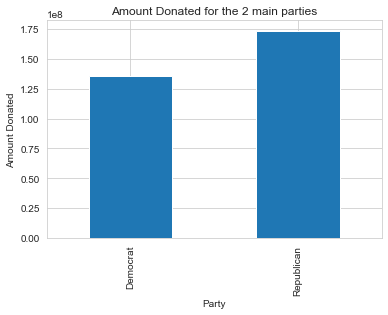

In [80]:
#Barchart showing the amount donated to each of the 2 parties
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')
plt.ylabel('Amount Donated')
plt.title('Amount Donated for the 2 main parties')

In [81]:
#New DF stores the amount donated to each candidate/party and the occupation of these donors
occupation_df = donor_df.pivot_table('contb_receipt_amt', index ='contbr_occupation', columns='Party',aggfunc ='sum')

In [82]:
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [83]:
#The shape of the DF shows there is over 45000 occupations listed, much of this may be redundant 
occupation_df.shape

(45067, 2)

In [84]:
#Getting only the occupations of the donors where the amount donated is greater than $1 million
occupation_df = occupation_df[occupation_df.sum(1) >= 1000000]

In [85]:
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
BANKER,224084.40,1259468.73
BUSINESS OWNER,449979.30,1323342.43
C.E.O.,1690.00,2592983.11
CEO,2073284.79,1618057.41


Text(0, 0.5, 'Occupation')

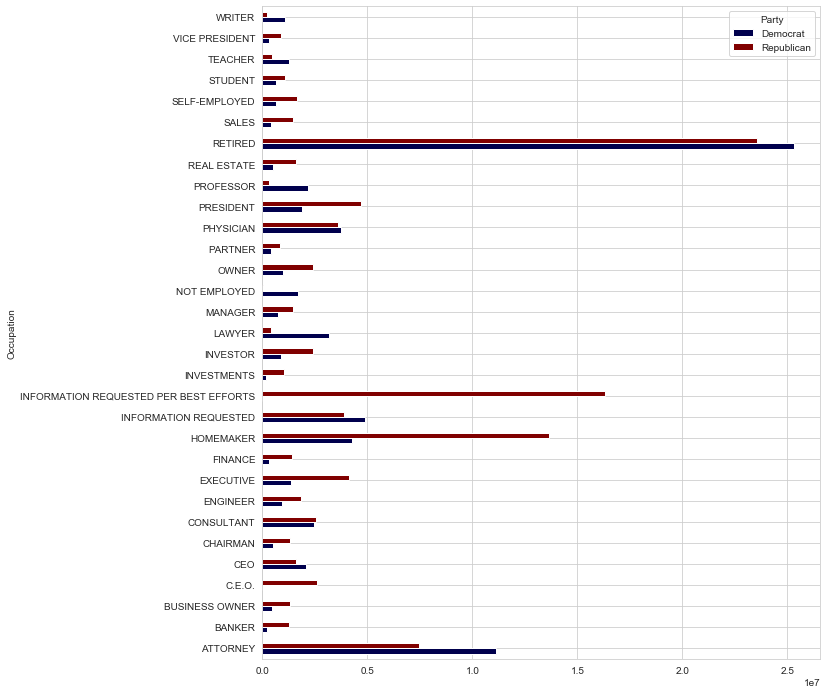

In [86]:
#Barplot showing the different occupations and their respective donation amounts
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')
plt.ylabel('Occupation')

In [87]:
#Dropping redundant and unreqired rows 
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'], axis = 0, inplace = True)

In [88]:
#Concatenating the two CEO related occupations into one row to remove the existing data redundancy
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']
occupation_df.drop('C.E.O.', inplace=True)

Text(0.5, 1.0, 'Occupations for donors of donations > $1000000 ')

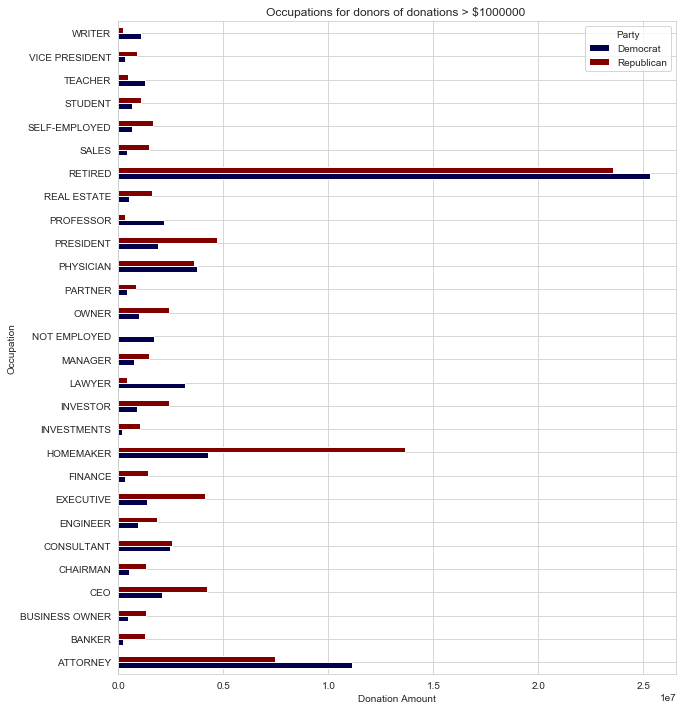

In [89]:
#Final barchart showing the updated occupations and their associated donation amounts
occupation_df.plot(kind = 'barh', figsize = (10,12), cmap='seismic')
plt.ylabel('Occupation')
plt.xlabel('Donation Amount')
plt.title('Occupations for donors of donations > $1000000 ')

In [90]:
###Add more graphs and visualisations etc etc 